# House Prices - Advanced Regression Techniques

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [56]:
train=pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
test=pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [60]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [61]:
Y=train.pop('SalePrice')

Missing Value

In [62]:
missing_values = train.isna().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [63]:
missing_values = test.isna().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

Filling missing Value

In [64]:
test['MSZoning']=test['MSZoning'].fillna(train['MSZoning'].mode()[0])

train['LotFrontage']=train['LotFrontage'].fillna(train['LotFrontage'].median())
test['LotFrontage']=test['LotFrontage'].fillna(train['LotFrontage'].median())

train['Alley']=train['Alley'].fillna('not_access')
test['Alley']=test['Alley'].fillna('not_access')

train['MasVnrType']=train['MasVnrType'].fillna('none')
test['MasVnrType']=test['MasVnrType'].fillna('none')

train['MasVnrArea']=train['MasVnrArea'].fillna(train['MasVnrArea'].median())
test['MasVnrArea']=test['MasVnrArea'].fillna(train['MasVnrArea'].median())

train['BsmtQual']=train['BsmtQual'].fillna('no')
test['BsmtQual']=test['BsmtQual'].fillna('no')

train['BsmtCond']=train['BsmtCond'].fillna('no')
test['BsmtCond']=test['BsmtCond'].fillna('no')

train['BsmtExposure']=train['BsmtExposure'].fillna('no')
test['BsmtExposure']=test['BsmtExposure'].fillna('no')

train['BsmtFinType1']=train['BsmtFinType1'].fillna('no')
test['BsmtFinType1']=test['BsmtFinType1'].fillna('no')

train['BsmtFinType2']=train['BsmtFinType2'].fillna('no')
test['BsmtFinType2']=test['BsmtFinType2'].fillna('no')

train['Electrical']=train['Electrical'].fillna(train['Electrical'].mode()[0])

train['FireplaceQu']=train['FireplaceQu'].fillna('no')
test['FireplaceQu']=test['FireplaceQu'].fillna('no')

train['GarageType']=train['GarageType'].fillna('no')
test['GarageType']=test['GarageType'].fillna('no')

train['GarageFinish']=train['GarageFinish'].fillna('no')
test['GarageFinish']=test['GarageFinish'].fillna('no')

train['GarageYrBlt']=train['GarageYrBlt'].fillna(0)
test['GarageYrBlt']=test['GarageYrBlt'].fillna(0)

train['GarageQual']=train['GarageQual'].fillna('no')
test['GarageQual']=test['GarageQual'].fillna('no')

train['GarageCond']=train['GarageCond'].fillna('no')
test['GarageCond']=test['GarageCond'].fillna('no')

train['PoolQC']=train['PoolQC'].fillna('no')
test['PoolQC']=test['PoolQC'].fillna('no')

train['Fence']=train['Fence'].fillna('no')
test['Fence']=test['Fence'].fillna('no')

train['MiscFeature']=train['MiscFeature'].fillna('no')
test['MiscFeature']=test['MiscFeature'].fillna('no')

test['Utilities']=test['Utilities'].fillna(train['Utilities'].mode()[0])

test['Exterior1st']=test['Exterior1st'].fillna(train['Exterior1st'].mode()[0])

test['Exterior2nd']=test['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])

test['BsmtFinSF1']=test['BsmtFinSF1'].fillna(train['BsmtFinSF1'].median())

test['BsmtFinSF2']=test['BsmtFinSF2'].fillna(train['BsmtFinSF2'].median())

test['BsmtUnfSF']=test['BsmtUnfSF'].fillna(train['BsmtUnfSF'].median()) 

test['TotalBsmtSF']=test['TotalBsmtSF'].fillna(train['TotalBsmtSF'].median())

test['BsmtFullBath']=test['BsmtFullBath'].fillna(train['BsmtFullBath'].median())

test['BsmtHalfBath']=test['BsmtHalfBath'].fillna(train['BsmtHalfBath'].median())

test['KitchenQual']=test['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

test['Functional']=test['Functional'].fillna(train['Functional'].mode()[0])

test['GarageCars']=test['GarageCars'].fillna(train['GarageCars'].median()) 

test['GarageArea']=test['GarageCars'].fillna(train['GarageArea'].median())

test['SaleType']=test['SaleType'].fillna(train['SaleType'].mode()[0])

In [65]:
train['MSSubClass'] = train['MSSubClass'].astype('object')
test['MSSubClass'] = test['MSSubClass'].astype('object')

In [66]:
missing_values = train.isna().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

Series([], dtype: int64)

In [67]:
missing_values = test.isna().sum()
missing_columns = missing_values[missing_values > 0]
missing_columns

Series([], dtype: int64)

Mutual Infomation

In [68]:
from sklearn.feature_selection import mutual_info_regression

X = train.copy()
    
for colname in X.select_dtypes(["object", "category"]):
    X[colname], _ = X[colname].factorize()

mi=np.zeros(80)
for i in range(20):
   mi_scores = mutual_info_regression(X, Y)
   mi=mi+mi_scores

mi_scores = pd.Series(mi/20, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

In [69]:
mi_scores.tail(50)

MSZoning         0.125617
BsmtUnfSF        0.119787
OverallCond      0.113826
WoodDeckSF       0.107064
MasVnrType       0.095461
MasVnrArea       0.091178
LotShape         0.086758
HalfBath         0.083684
SaleCondition    0.082303
HouseStyle       0.081124
BsmtExposure     0.077388
SaleType         0.077039
GarageCond       0.075543
GarageQual       0.070441
CentralAir       0.067575
BedroomAbvGr     0.067078
Electrical       0.051272
BsmtCond         0.050450
PavedDrive       0.047076
Fence            0.044324
BldgType         0.042618
LandContour      0.029497
BsmtFinType2     0.026767
Alley            0.026180
EnclosedPorch    0.025998
Condition1       0.021449
ScreenPorch      0.021080
BsmtFullBath     0.020667
KitchenAbvGr     0.018866
ExterCond        0.016209
LotConfig        0.016080
RoofStyle        0.015586
Heating          0.013588
BsmtHalfBath     0.010778
Functional       0.007199
BsmtFinSF2       0.006080
LowQualFinSF     0.004884
RoofMatl         0.004727
MiscFeature 

In [70]:
train.drop(['BsmtCond','PavedDrive','Electrical','Fence','BldgType','BsmtFinType2','EnclosedPorch','LandContour','Alley','BsmtFullBath','ScreenPorch','Condition1','ExterCond','KitchenAbvGr','Heating','LotConfig','RoofStyle','BsmtHalfBath','Functional','LandSlope','BsmtFinSF2','3SsnPorch','LowQualFinSF','Condition2','RoofMatl','MiscFeature','PoolQC','YrSold','Utilities','MiscVal','Street','PoolArea','MoSold','Id'],axis=1,inplace=True)
test.drop(['BsmtCond','PavedDrive','Electrical','Fence','BldgType','BsmtFinType2','EnclosedPorch','LandContour','Alley','BsmtFullBath','ScreenPorch','Condition1','ExterCond','KitchenAbvGr','Heating','LotConfig','RoofStyle','BsmtHalfBath','Functional','LandSlope','BsmtFinSF2','3SsnPorch','LowQualFinSF','Condition2','RoofMatl','MiscFeature','PoolQC','YrSold','Utilities','MiscVal','Street','PoolArea','MoSold','Id'],axis=1,inplace=True)

Correlation

In [71]:
x=train[num_cols].corr()

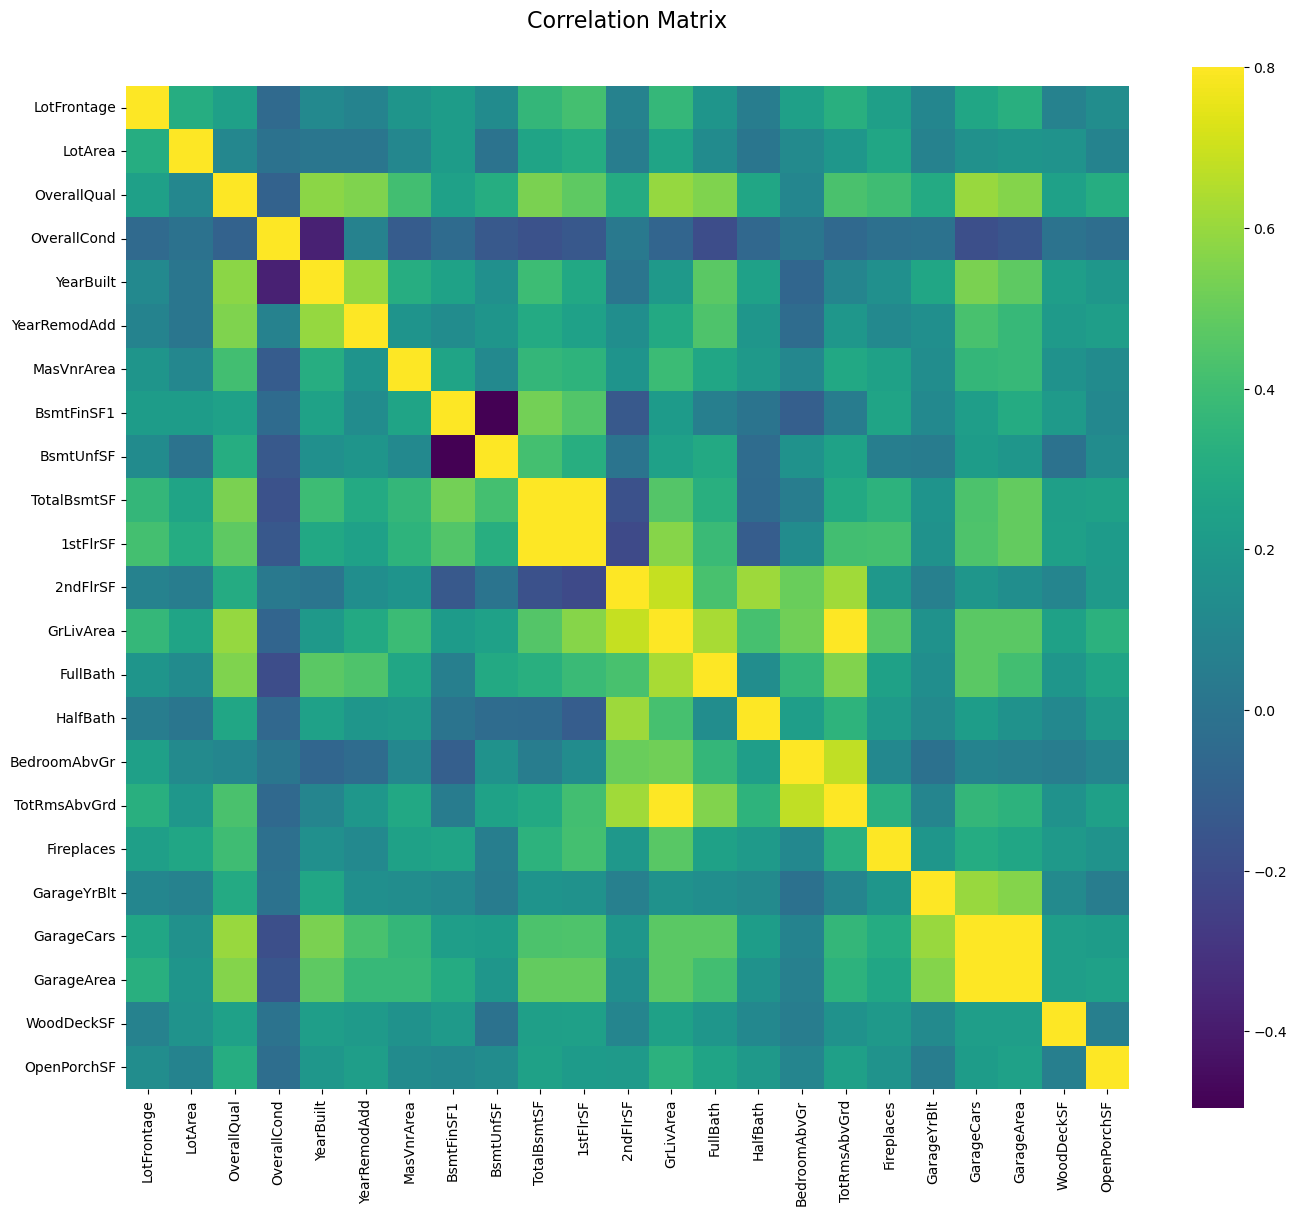

In [72]:
f, ax = plt.subplots(figsize=(14, 12))

plt.title('Correlation Matrix', y=1.05, size=16)

sns.heatmap(x, square=True, vmax=0.8, cmap='viridis', ax=ax) #annot=True

plt.tight_layout()
plt.show()

In [74]:
mi_scores.head(30)

OverallQual     0.566309
Neighborhood    0.496742
GrLivArea       0.482087
TotalBsmtSF     0.366853
YearBuilt       0.363873
GarageArea      0.363176
GarageCars      0.360230
BsmtQual        0.326290
ExterQual       0.325362
KitchenQual     0.324410
1stFlrSF        0.309724
MSSubClass      0.276153
GarageFinish    0.261313
FullBath        0.260682
GarageYrBlt     0.257098
YearRemodAdd    0.248839
TotRmsAbvGrd    0.219243
LotFrontage     0.217856
FireplaceQu     0.210945
GarageType      0.202186
2ndFlrSF        0.200282
Foundation      0.193550
Fireplaces      0.167958
HeatingQC       0.165236
Exterior2nd     0.163527
LotArea         0.159653
BsmtFinType1    0.152571
OpenPorchSF     0.148681
BsmtFinSF1      0.147659
Exterior1st     0.128155
Name: MI Scores, dtype: float64

In [75]:
train.drop(['1stFlrSF','TotalBsmtSF','GarageCars'],axis=1,inplace=True)
test.drop(['1stFlrSF','TotalBsmtSF','GarageCars'],axis=1,inplace=True)

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   Neighborhood   1460 non-null   object 
 6   HouseStyle     1460 non-null   object 
 7   OverallQual    1460 non-null   int64  
 8   OverallCond    1460 non-null   int64  
 9   YearBuilt      1460 non-null   int64  
 10  YearRemodAdd   1460 non-null   int64  
 11  Exterior1st    1460 non-null   object 
 12  Exterior2nd    1460 non-null   object 
 13  MasVnrType     1460 non-null   object 
 14  MasVnrArea     1460 non-null   float64
 15  ExterQual      1460 non-null   object 
 16  Foundation     1460 non-null   object 
 17  BsmtQual       1460 non-null   object 
 18  BsmtExpo

In [77]:
num_cols = train.select_dtypes(include=np.number).columns.tolist()
cat_cols = train.select_dtypes(exclude=np.number).columns.tolist()

In [78]:
combined_df=pd.concat([train,test],axis=0)
combined_df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType,GarageYrBlt,GarageFinish,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,SaleType,SaleCondition
0,60,RL,65.0,8450,Reg,CollgCr,2Story,7,5,2003,...,Attchd,2003.0,RFn,548.0,TA,TA,0,61,WD,Normal
1,20,RL,80.0,9600,Reg,Veenker,1Story,6,8,1976,...,Attchd,1976.0,RFn,460.0,TA,TA,298,0,WD,Normal
2,60,RL,68.0,11250,IR1,CollgCr,2Story,7,5,2001,...,Attchd,2001.0,RFn,608.0,TA,TA,0,42,WD,Normal
3,70,RL,60.0,9550,IR1,Crawfor,2Story,7,5,1915,...,Detchd,1998.0,Unf,642.0,TA,TA,0,35,WD,Abnorml
4,60,RL,84.0,14260,IR1,NoRidge,2Story,8,5,2000,...,Attchd,2000.0,RFn,836.0,TA,TA,192,84,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Reg,MeadowV,2Story,4,7,1970,...,no,0.0,no,0.0,no,no,0,0,WD,Normal
1455,160,RM,21.0,1894,Reg,MeadowV,2Story,4,5,1970,...,CarPort,1970.0,Unf,1.0,TA,TA,0,24,WD,Abnorml
1456,20,RL,160.0,20000,Reg,Mitchel,1Story,5,7,1960,...,Detchd,1960.0,Unf,2.0,TA,TA,474,0,WD,Abnorml
1457,85,RL,62.0,10441,Reg,Mitchel,SFoyer,5,5,1992,...,no,0.0,no,0.0,no,no,80,32,WD,Normal


In [79]:
print(combined_df[cat_cols].nunique())

cat1=[]
cat2=[]

for i in combined_df[cat_cols].columns:
  if combined_df[i].nunique()<=10:
    cat1.append(i)
  else:
    cat2.append(i)

MSSubClass       16
MSZoning          5
LotShape          4
Neighborhood     25
HouseStyle        8
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
Foundation        6
BsmtQual          5
BsmtExposure      5
BsmtFinType1      7
HeatingQC         5
CentralAir        2
KitchenQual       4
FireplaceQu       6
GarageType        7
GarageFinish      4
GarageQual        6
GarageCond        6
SaleType          9
SaleCondition     6
dtype: int64


In [80]:
cat2

['MSSubClass', 'Neighborhood', 'Exterior1st', 'Exterior2nd']

In [81]:
combined_df[cat1]

,MSZoning,LotShape,HouseStyle,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,CentralAir,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition
0,RL,Reg,2Story,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Y,Gd,no,Attchd,RFn,TA,TA,WD,Normal
1,RL,Reg,1Story,none,TA,CBlock,Gd,Gd,ALQ,Ex,Y,TA,TA,Attchd,RFn,TA,TA,WD,Normal
2,RL,IR1,2Story,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Y,Gd,TA,Attchd,RFn,TA,TA,WD,Normal
3,RL,IR1,2Story,none,TA,BrkTil,TA,No,ALQ,Gd,Y,Gd,Gd,Detchd,Unf,TA,TA,WD,Abnorml
4,RL,IR1,2Story,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Y,Gd,TA,Attchd,RFn,TA,TA,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Reg,2Story,none,TA,CBlock,TA,No,Unf,Gd,Y,TA,no,no,no,no,no,WD,Normal
1455,RM,Reg,2Story,none,TA,CBlock,TA,No,Rec,TA,Y,TA,no,CarPort,Unf,TA,TA,WD,Abnorml
1456,RL,Reg,1Story,none,TA,CBlock,TA,No,ALQ,Ex,Y,TA,TA,Detchd,Unf,TA,TA,WD,Abnorml
1457,RL,Reg,SFoyer,none,TA,PConc,Gd,Av,GLQ,TA,Y,TA,no,no,no,no,no,WD,Normal


Encoding

In [83]:
from sklearn.preprocessing import OneHotEncoder

encoder=OneHotEncoder(sparse=False,handle_unknown='ignore')

encoder.fit(combined_df[cat1])

encoded_cols=encoder.get_feature_names(cat1)

combined_df[encoded_cols]=encoder.transform(combined_df[cat1])

In [84]:
combined_df.drop(cat1,axis=1,inplace=True)

In [85]:
combined_df

,MSSubClass,LotFrontage,LotArea,Neighborhood,OverallQual,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,Exterior2nd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,CollgCr,7,5,2003,2003,VinylSd,VinylSd,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20,80.0,9600,Veenker,6,8,1976,1976,MetalSd,MetalSd,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60,68.0,11250,CollgCr,7,5,2001,2002,VinylSd,VinylSd,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70,60.0,9550,Crawfor,7,5,1915,1970,Wd Sdng,Wd Shng,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60,84.0,14260,NoRidge,8,5,2000,2000,VinylSd,VinylSd,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,MeadowV,4,7,1970,1970,CemntBd,CmentBd,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1455,160,21.0,1894,MeadowV,4,5,1970,1970,CemntBd,CmentBd,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1456,20,160.0,20000,Mitchel,5,7,1960,1996,VinylSd,VinylSd,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1457,85,62.0,10441,Mitchel,5,5,1992,1992,HdBoard,Wd Shng,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [86]:
combined_df['MSSubClass'].value_counts()

MSSubClass
20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: count, dtype: int64

In [87]:
combined_df['Neighborhood'].value_counts()

Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: count, dtype: int64

In [88]:
combined_df['Exterior1st'].value_counts()

Exterior1st
VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: count, dtype: int64

In [89]:
combined_df['Exterior2nd'].value_counts()

Exterior2nd
VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: count, dtype: int64

In [91]:
encoder1=OneHotEncoder(sparse=False,handle_unknown='ignore')

encoder1.fit(combined_df[cat2])

encoded_cols1=encoder1.get_feature_names(cat2)

combined_df[encoded_cols1]=encoder1.transform(combined_df[cat2])

In [92]:
combined_df.drop(cat2,axis=1,inplace=True)

In [93]:
combined_df

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,2ndFlrSF,...,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,65.0,8450,7,5,2003,2003,196.0,706.0,150.0,854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,80.0,9600,6,8,1976,1976,0.0,978.0,284.0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,68.0,11250,7,5,2001,2002,162.0,486.0,434.0,866,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,60.0,9550,7,5,1915,1970,0.0,216.0,540.0,756,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,84.0,14260,8,5,2000,2000,350.0,655.0,490.0,1053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,7,1970,1970,0.0,0.0,546.0,546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1455,21.0,1894,4,5,1970,1970,0.0,252.0,294.0,546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1457,62.0,10441,5,5,1992,1992,0.0,337.0,575.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [94]:
dop=['MSSubClass_150','MSSubClass_40','Neighborhood_Veenker','Neighborhood_NPkVill','Neighborhood_Blueste','Exterior1st_ImStucc','Exterior1st_CBlock','Exterior1st_BrkComm','Exterior1st_AsphShn','Exterior1st_Stone','Exterior2nd_Stone','Exterior2nd_AsphShn','Exterior2nd_CBlock','Exterior2nd_Other']
combined_df.drop(dop,axis=1,inplace=True)

In [95]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Columns: 181 entries, LotFrontage to Exterior2nd_Wd Shng
dtypes: float64(167), int64(14)
memory usage: 4.1 MB


In [96]:
X_train=combined_df[:1460]
X_test=combined_df[1460:]

Scaling

In [97]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train[num_cols])
X_train[num_cols]=scaler.transform(X_train[num_cols])
X_test[num_cols]=scaler.transform(X_test[num_cols])

/tmp/ipykernel_49403/3761791263.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_cols]=scaler.transform(X_train[num_cols])
/tmp/ipykernel_49403/3761791263.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[num_cols]=scaler.transform(X_test[num_cols])


Model

In [100]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor

from xgboost import XGBRegressor

from sklearn.svm import SVR

from sklearn.neural_network import MLPRegressor

from sklearn.gaussian_process import GaussianProcessRegressor

from lightgbm import LGBMRegressor

from catboost import CatBoostRegressor

In [101]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [102]:
model={'RandomForest':RandomForestRegressor(),
'Gradientboost':GradientBoostingRegressor(),
'Adaboost':AdaBoostRegressor(),
'LinearRegression':LinearRegression(),
'Ridge':Ridge(), 
'Lasso':Lasso(), 
'ElasticNet':ElasticNet(), 
'SGDRegressor':SGDRegressor(),
'DecisionTree':DecisionTreeRegressor(),
'KNN':KNeighborsRegressor(), 
'RKNN':RadiusNeighborsRegressor(),
'ExtraTree':ExtraTreeRegressor(),
'XGboost':XGBRegressor(),
'SVR1':SVR(kernel='linear'),
'SVR2':SVR(kernel='poly'),
'SVR3':SVR(kernel='rbf'),
'SVR4':SVR(kernel='sigmoid'),
'NN':MLPRegressor(),
'GaussianProcessRegressor':GaussianProcessRegressor(),
'LGBMRegressor':LGBMRegressor(verbose=0),
'CatBoostRegressor':CatBoostRegressor(verbose=0)}

In [103]:
def score(X,Y):
  m=[]
  cv=[]
  m_sq=[]
  m_abs=[]
  r2_s=[]
  for i in model:
    mod=model[i]
    m.append(i)

    cross_value=cross_val_score(mod,X,Y,cv=5,scoring='neg_mean_squared_error')
    cv.append(np.mean(cross_value))

    X1,X2,y1,y2=train_test_split(X,Y,test_size=0.2,random_state=42)

    mod.fit(X1,y1)
    p=mod.predict(X2)

    mean_sq_er=mean_squared_error(y2,p)
    mean_abs_er=mean_absolute_error(y2,p)
    r2=r2_score(y2,p)

    m_sq.append(mean_sq_er)
    m_abs.append(mean_abs_er)
    r2_s.append(r2)

  df=pd.DataFrame({'model':m,'cv':cv,'m_sq':m_sq,'m_abs':m_abs,'r2':r2_s})
  print(df.sort_values(by='cv',ascending=False))


In [104]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [105]:
score(X_train,Y)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
                       model            cv          m_sq         m_abs  \
1              Gradientboost -7.032680e+08  7.729176e+08  1.743696e+04   
20         CatBoostRegressor -7.181557e+08  7.268234e+08  1.558988e+04   
12                   XGboost -8.444139e+08  6.948176e+08  1.744414e+04   
0               RandomForest -9.107585e+08  8.853535e+08  1.819734e+04   
19             LGBMRegressor -9.293086e+08  8.829176e+08  1.723718e+04   
4                      Ridge -1.078970e+09  9.979222e+08  1.968941e+04   
7 

In [106]:
final=GradientBoostingRegressor()

final.fit(X_train,Y)
pred=final.predict(X_test)

dk=pd.DataFrame({'Id':[i for i in range(1461,2920)],'SalePrice':pred})

dk.to_csv('sub1.csv',index=False)

In [107]:
final=CatBoostRegressor(verbose=0)

final.fit(X_train,Y)
pred=final.predict(X_test)

dk=pd.DataFrame({'Id':[i for i in range(1461,2920)],'SalePrice':pred})

dk.to_csv('sub2.csv',index=False)

In [108]:
final=LGBMRegressor(verbose=0)

final.fit(X_train,Y)
pred=final.predict(X_test)

dk=pd.DataFrame({'Id':[i for i in range(1461,2920)],'SalePrice':pred})

dk.to_csv('sub3.csv',index=False)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines


In [109]:

final=RandomForestRegressor()

final.fit(X_train,Y)
pred=final.predict(X_test)

dk=pd.DataFrame({'Id':[i for i in range(1461,2920)],'SalePrice':pred})

dk.to_csv('sub4.csv',index=False)

In [110]:

final=XGBRegressor()

final.fit(X_train,Y)
pred=final.predict(X_test)

dk=pd.DataFrame({'Id':[i for i in range(1461,2920)],'SalePrice':pred})

dk.to_csv('sub5.csv',index=False)

In [112]:
from sklearn.model_selection import GridSearchCV
best_r_f=mod1.best_estimator_

pred=best_r_f.predict(test)

rt=pd.DataFrame({'Passengerid':[i for i in range(892,1310)],'Survived':pred})

rt.to_csv('sub4.csv', index=False)
param_grid = {
    'iterations': [100, 200, 300,500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5],
}

model = CatBoostRegressor(silent=True)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1,verbose=1)

grid_search.fit(X_train, Y)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[Parallel(n_jobs=-1)]: Done  42 task

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x758af5a7b1f0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10],
                         'iterations': [100, 200, 300, 500],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='neg_mean_squared_error', verbose=1)

In [114]:
best_r_f=grid_search.best_estimator_

pred=best_r_f.predict(X_test)

dk=pd.DataFrame({'Id':[i for i in range(1461,2920)],'SalePrice':pred})

dk.to_csv('sub6.csv', index=False)